# Python Foundations:  Argument unpacking
New Python syntax / concepts - working effectively with *arg and **kwargs

Foundations notebook available on Github from the powderflask/cap-comp215 repository.
As usual, the first code block just imports the modules we will use.

In [1]:
import math

import matplotlib.pyplot as plt

## New Python Syntax: argument unpacking

In [12]:
def print_args(*args, **kwargs):
    print(f'positional args is a {type(args)}: {args}')
    print(f'keyword args is a {type(kwargs)}: {kwargs}')

print_args(42, 'hello', foo=True, bar=[1,2,3])

positional args is a <class 'tuple'>: (42, 'hello')
keyword args is a <class 'dict'>: {'foo': True, 'bar': [1, 2, 3]}


In [11]:
def divide(numerator, denominator, *args, **kwargs):
  return numerator/denominator

values = (3,10)
divide(*values)

divide(denominator = 9, numerator=3)

dictvalues = dict(denominator = 6, numerator=3, other=42, nonsense=99)
divide(**dictvalues)

0.5

### Unpacking a dictionary or tuple to pass a collection of arguments

In [13]:
a = ("cool", 'numbers')
d = dict(phi=1.618033988749, pi=math.pi, h=6.62607015e-34)

print_args(*a, **d)

positional args is a <class 'tuple'>: ('cool', 'numbers')
keyword args is a <class 'dict'>: {'phi': 1.618033988749, 'pi': 3.141592653589793, 'h': 6.62607015e-34}


#### Argument Unpacking: example
unpacking data dictionary and empirical coefficient values for *Basal Metabolic Rate* (BMR) calculation:

males :   `BMR = 66 + 13.7 * weight (kg) + 5 * height (cm) - 6.8 * age (years)`

female: `BMR = 655 + 9.6 * weight (kg) + 1.8 * height (cm) - 4.7 * age (years)`

In [4]:
people = (
    dict(name='bob', gender='male', weight=70, height=180, age=45),
    dict(name='bei', gender='female', weight=55, height=175, age=35),
    dict(name='kai', gender='male', weight=90, height=210, age=24),
    dict(name='kia', gender='female', weight=60, height=185, age=27),
)

BMR_PARAMS = dict(
    male=(66, 13.7, 5, -6.8),     # 66 + 13.7 * weight (kg) + 5 * height (cm) - 6.8 * age (years)
    female=(655, 9.6, 1.8, -4.7), # 655 + 9.6 * weight (kg) + 1.8 * height (cm) - 4.7 * age (years)
)

def bmr(a, b, c, d, weight, height, age, **kwargs):
    """ Return the BMR for coefficients a,b,c,d and given weight (kg), height (cm) and age (years) """
    return a + b*weight + c*height + d*age

{
    p['name']: bmr(*BMR_PARAMS[p['gender']], **p)   for p in people
}

{'bob': 1619.0, 'bei': 1333.5, 'kai': 2185.8, 'kia': 1437.1}

#### Argument Unpacking: example
unpacking coordinates for line segments in a 7-segment display.

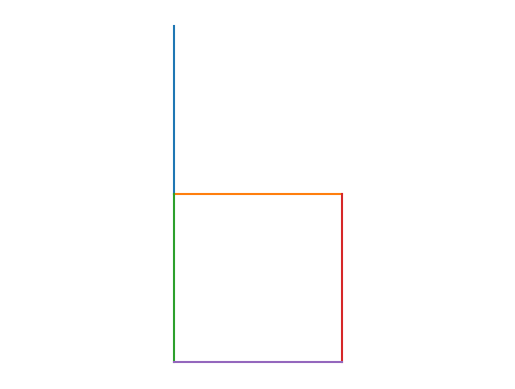

In [16]:
# (start, end) coordinates for each segment on a 3 x 5 grid (0, 0) to (2, 4)
SEGS_COORDS = (
    ((0,4), (2,4)),  # top horizontal
    ((0,2), (0,4)),  # left-upper vertical
    ((2,2), (2,4)),  # right-upper vertical
    ((0,2), (2,2)),  # middle horizontal
    ((0,0), (0,2)),  # left-lower vertical
    ((2,0), (2,2)),  # right-lower vertical
    ((0,0), (2,0)),  # bottom horizontal
)
# Transform coordinate pairs ((x1, y1), (x2, y2)) into ordinate vectors ((x1, x2), (y1, y2)) (for matplotlib)
SEG_ORDS = [zip(*coords) for coords in SEGS_COORDS]
# List of segments needed to display each of 9 digits
SEGMENTS = (
    (0, 1, 2, 4, 5, 6),
    (2, 5),
    (0, 2, 3, 4, 6),
    (0, 2, 3, 5, 6),
    (1, 2, 3, 5),
    (0, 1, 3, 5, 6),
    (1, 3, 4, 5, 6),
    (0, 2, 5),
    (0, 1, 2, 3, 4, 5, 6),
    (0, 1, 2, 3, 5)
)

def seven_seg_display(d):
    """ Plot digit d as a seven segment display """
    assert 0 <= d <= 9
    for seg in SEGMENTS[d]:
        plt.plot(*SEG_ORDS[seg])

N = 6
seven_seg_display(N)
plt.axis('equal')
plt.axis('off')
plt.show()